<a href="https://colab.research.google.com/github/PatriciaTnk/Dados/blob/main/An%C3%A1lise_de_agrupamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de agrupamento de dados

#**Medidas de (dis)similaridade**

 A definição de uma medida de (dis)similaridade para um problema de agrupamento de
 dados é de grande importância, uma vez que ela será uma das principais responsáveis
 por definir a estrutura de grupos produzida. A escolha de uma medida é uma decisão
 importante e deve levar em conta diversos fatores. Dentre eles, um dos mais importantes
 envolve os tipos de atributos à disposição (quantitativo, qualitativo nominal, qualitativo
 ordinal, misto etc.).
 Boa parte das medidas de dissimilaridade para objetos com atributos quantitativos
 são baseadas na distância de Minkowski. Considerando dois objetos xi e xj, essa distância
 é definida como:

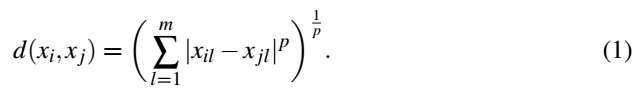

Aescolha do valor de p define variações para essa medida. Dentre elas, os três casos mais  conhecidos são:

 • Distância Manhattan (p = 1):

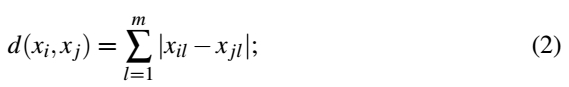

 • Distância euclidiana (p = 2):

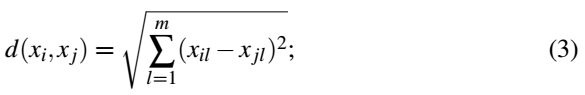

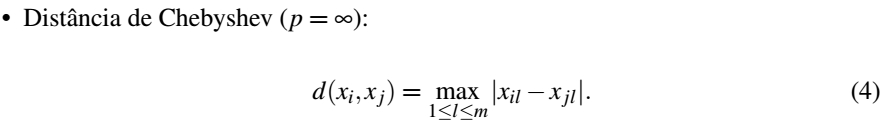

Em Python, diversas medidas de distância podem ser calculadas para um conjunto  de dados por meio da função pdist do módulo scipy.spatial.distance1.

Um exemplo de código é apresentado a seguir.

In [ ]:
 from scipy.spatial.distance import pdist, squareform
 import pandas as pd
 import numpy as np

 # carregando iris.csv sem a coluna que contem
 # os rotulos das classes
 dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Examples/Iris.csv', usecols=[0, 1, 2, 3])
 # O metodo 'pdist' recebe como entrada um numpy.array.
 # O atributo 'values' de um pandas.DataFrame retorna
 # seus valores em tal formato.
 dados = dados.values
 # 'pdist' calcula as distancias entre todos os pares
 # possiveis de objetos. O parametro 'metric' define
 # qual medida de (dis)similaridade sera calculada.
 distancias = pdist(dados, metric='euclidean')
 # O metodo 'pdist' retorna um numpy.array contendo
 # n * (n- 1) / 2 elementos. Para transforma-lo em
 # um numpy.array de dimensao n x n pode-se utilizar
 # o metodo 'squareform'.
 distancias = squareform(distancias)
 distancias_arr = np.round(distancias, 2)
 print(distancias_arr)

[[  0.     1.14   2.06 ... 147.06 148.06 149.05]
 [  1.14   0.     1.04 ... 146.06 147.06 148.05]
 [  2.06   1.04   0.   ... 145.06 146.07 147.05]
 ...
 [147.06 146.06 145.06 ...   0.     1.14   2.09]
 [148.06 147.06 146.07 ...   1.14   0.     1.16]
 [149.05 148.05 147.05 ...   2.09   1.16   0.  ]]


**Exercício 1.** Considerando os três casos da distância de Minkowski apresentados (p = 1, p = 2 e p = infinito), comente, para cada um, qual o formato da superfície gerada por todos os possíveis objetos equidistantes a um objeto central.

#**Algoritmos hierárquicos**

Enquanto algoritmos particionais geram apenas uma partição, algoritmos hierárquicos produzem uma sequência de partições rígidas aninhadas, cada uma contendo uma quantidade diferente de grupos. Esses algoritmos podem seguir duas abordagens:

 1. Abordagem aglomerativa: o algoritmo inicia com n grupos, cada um formado por  um objeto diferente do conjunto de dados. Em cada passo, os dois grupos mais próximos, segundo algum critério pré-estabelecido, são unidos. Desse modo, o
 procedimento é repetido até que reste apenas um único grupo contendo todos os  objetos.

 2. Abordagem divisiva: o algoritmo inicia com apenas um grupo contendo todos os  objetos. Em cada passo, algum dos grupos é dividido em dois novos grupos, segundo algum critério pré-estabelecido. Todo o procedimento é realizado até que sejam formados n grupos, cada um contendo apenas um objeto do conjunto de dados original.


 Os algoritmos hierárquicos clássicos da literatura são baseados na abordagem aglomerativa e podem ser sumarizados pelo Algoritmo 1.

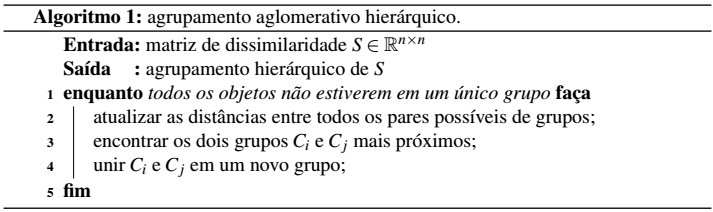

 À execução do passo 3 do algoritmo acima dá-se o nome de linkage (ligação).

 A principal diferença entre vários dos algoritmos aglomerativos está no modo como a atualização das distâncias entre os grupos é feita (passo 2). Os métodos mais conhecidos são:


 • Single-linkage: a distância d(Ci,Cj) entre dois grupos é dada pela distância mínima entre os seus objetos. Ou seja:

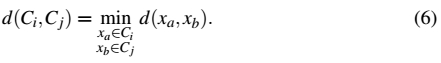

 • Complete-linkage: a distância d(CiCj) entre dois grupos é dada pela distância má
xima entre os seus objetos. Ou seja:

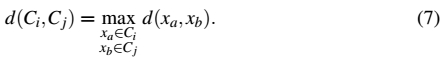

 • Average-linkage: a distância d(CiCj) entre dois grupos é dada pela distância média
 entre os objetos de diferentes grupos. Ou seja:

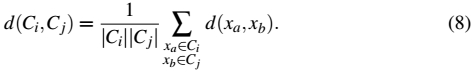

Por fim, umadas principais vantagens de algoritmos de agrupamento hierárquicos advém da representação dos seus resultados por meio de dendrogramas. Um dendrograma
 é uma representação gráfica em formato de árvore que apresenta a hierarquia de partições obtidas. Na Figura gerada pelo código abaixo é apresentado um exemplo de dendrograma, utilizando o método complete-linkage, para o conjunto de dados artificial blobs.csv, que contém 20 instâncias separadas em três grupos correspondentes a três distribuições normais multivariadas. No eixo horizontal é apresentado o índice de cada objeto. No eixo vertical é apresentado o valor de distância quando cada par de objetos foi unido. As possíveis partições são definidas por meio de cortes no dendrograma.

 Em Python, a biblioteca SciPy fornece as implementações dos três algoritmos de agrupamento hierárquico citados anteriormente, além de uma função para a plotagem de
 dendrogramas. Um exemplo de código, utilizando o conjunto blobs.csv é apresentado a seguir.

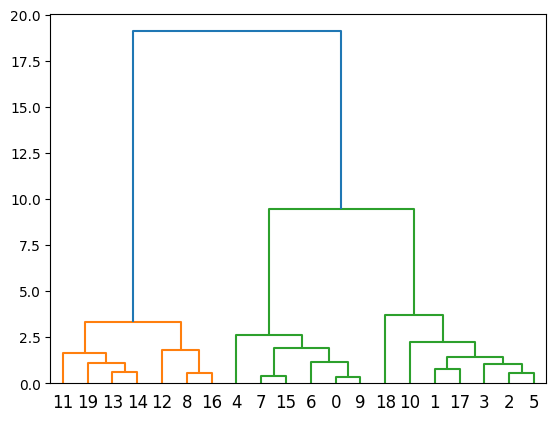

In [ ]:
 from scipy.cluster.hierarchy import linkage
 from scipy.cluster.hierarchy import fcluster
 from scipy.cluster.hierarchy import dendrogram
 from matplotlib import pyplot
 import pandas
 # carregando blobs.csv sem a coluna 'label'
 dados = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/Examples/blobs.csv', usecols=[0, 1])
 # O metodo 'linkage' recebe como entrada um numpy.array.
 # O atributo 'values' de um pandas.DataFrame retorna
 # seus valores em tal formato.
 dados = dados.values
 # Aplicando o agrupamento hierarquico aos dados.
 # O parametro 'method' define qual algoritmo sera
 # utilizado.
 # Varios metodos de agrupamento estao disponiveis. Para
 # os exemplos deste material sera utilizado
 # method='average', method='complete' ou
 # method='single'.
 # O parametro 'metric' define a medida de
 # (dis)similaridade a ser utilizada. Para uma lista
 # de medidas disponiveis recomenda-se a documentacao
 # do metodo scipy.spatial.distance.pdist.
 h = linkage(dados, method='complete', metric='euclidean')
 # Para plotar o dendrograma utiliza-se o metodo
 # 'dendrogram'.
 dendrogram(h)
 pyplot.show()
 #Ometodofclusterrecebecomoentradauma
 #hierarquiageradapelometodolinkageeextrai
 #gruposdamesmasegundoalgumcriterio.
 #Abaixoseraoextraidososgrupospormeiodeumlimiar
 #de distancia.SegundoodendrogramadaFigura
 #4.1,oqualfoigeradoatravesdometodo
 #complete-linkage,umlimiarde7.5pareceser
 #adequado.
 #Avariavel'rotulos'seraumnumpy.array
 #ondeovalorcontidoemrotulos[i]indicaorotulo
 #do objetoi.
 rotulos_dist=fcluster(h,t=7.5,criterion='distance')
 #Casoocriterioescolhidosejaonumerode
 #grupos,ometodofclusterestimasozinhoumvalor
 #de distanciademodoquetgrupossejamformados.
 #Porexemplo,paraextrair3grupos:
 rotulos_k=fcluster(h,t=3,criterion='maxclust')

**Exercício 2.** Considerando um conjunto de dados X = {x1, ... x5} e a matriz de distâncias

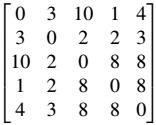


 Nessa matriz,cada elemento aij indica a distância entre xi e xj. Aplique à matriz os três algoritmos hierárquicos descritos nesta seção e descreva, os cálculos realizados por cada um deles em cada passo.

#**Algoritmo k-means**

 O algoritmo k-means busca por uma partição que minimize a soma dos erros quadráticos (SSE, do inglês, sum of squared errors) entre os objetos de um conjunto de dados e o centróide dos seus respectivos grupos. A medida SSE é definida como:

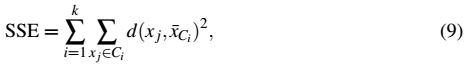

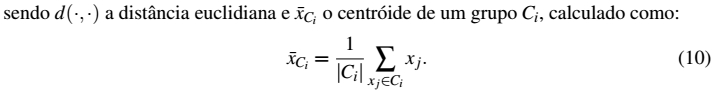

O algoritmo k-means é um procedimento de otimização com inicialização aleatória que garante a convergência para um mínimo local da Equação (9). O mesmo é apresentado no Algoritmo 2.

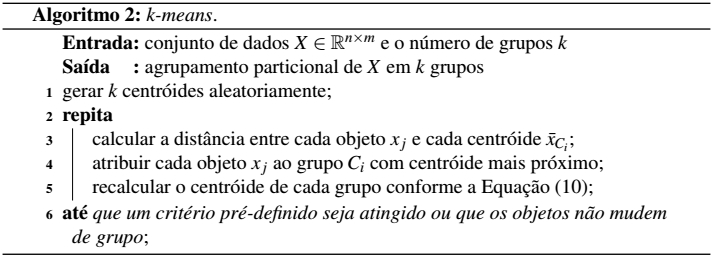

Um exemplo da execução do k-means para o conjunto blobs.csv é apresentado abaixo.

In [ ]:
from sklearn.cluster import k_means
import pandas

# carregando blobs.csv sem a coluna 'label'
dados = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/Examples/blobs.csv', usecols=[0, 1])
# O metodo 'k_means' recebe como entrada um numpy.array.
# O atributo 'values' de um pandas.DataFrame retorna
# seus valores em tal formato.
dados = dados.values
# Executa o algoritmo k-means.
# 'n_clusters' indica o numero de grupos buscados.
# 'init' indica o tipo de inicializacao.
# 'n_init' indica a quantidade de vezes que o algoritmo
# sera executado. Dentre todas as 'n_init' execucoes,
# eh retornada aquela com o menor valor de sse.
# O metodo retorna tres valores: o primeiro, um
# um numpy.array com k linhas e m colunas,
# contendo os centroides finais; o segundo, um
# numpy.array contendo os rotulos de cada objeto; e,
# por fim, o valor de sse da solucao retornada.
centroides, rotulos, sse = k_means(dados,
n_clusters=3,
init='random',
n_init=100)

**Exercício 3.** Considerando a função objetivo do k-means, apresentada na Equação (9):

a) Discuta quais serão as características dos grupos encontrados por esse algoritmo.


b) Descreva em quais cenários o k-means não é capaz de produzir agrupamentos de boa qualidade.

#**Algoritmo DBSCAN**

O algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) busca por grupos definidos como regiões com alta densidade de objetos, separados por
regiões de baixa densidade. Uma das principais vantagens desse algoritmo advém do fato de não ser necessário informar previamente o número desejado de grupos. Para isso, ele se baseia na classificação de cada objeto do conjunto de dados em uma dentre 3 categorias:

• Objeto central: todo objeto xi contendo uma quantidade de objetos vizinhos, contando ele próprio, maior ou igual a um parâmetro MinPts. Um vizinho é determinado como todo objeto separado por, no máximo, uma distância ε de xi.

• Objeto de borda: todo objeto que não satisfaz as condições para objeto central, mas que pertence à vizinhança de um objeto central.

• Ruído: todo objeto que não pertence a nenhuma das duas categorias anteriores.

A Figura abaixo ilustra um exemplo da classificação de um conjunto de objetos considerando MinPts = 3. Nela, os objetos vermelhos são centrais, os amarelos de borda e o
azul é ruído. Os círculos em torno de cada objeto denotam o raio ε que define as vizinhanças. O Algoritmo 3 apresenta o pseudocódigo do algoritmo DBSCAN.

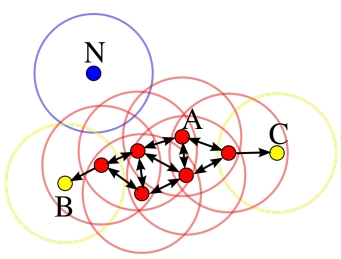

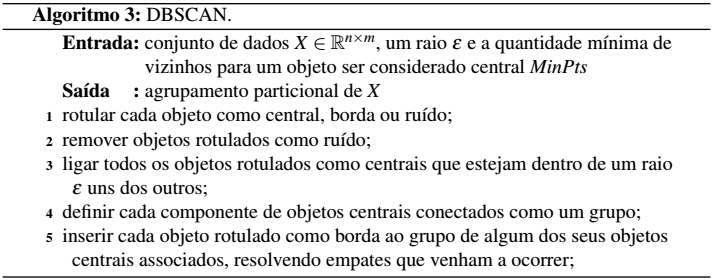

Por fim, um exemplo em Python da aplicação do algoritmo DBSCAN a um conjunto de dados é apresentado no código a seguir.

In [ ]:
from sklearn.cluster import dbscan
import pandas
# carregando blobs.csv sem a coluna 'label'
dados = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/Examples/blobs.csv', usecols=[0, 1])
# O metodo 'dbscan' recebe como entrada um numpy.array.
# O atributo 'values' de um pandas.DataFrame retorna
# seus valores em tal formato.
dados = dados.values
# Executa o algoritmo DBSCAN.
# 'eps' eh o parametro que define o raio de cada objeto.
# 'min_samples' indica a quantidade minima de objetos
# para considerar um objeto como central.
# 'metric' define a medida de distancia a ser utilizada
# e, seu valor padrao consiste na distancia euclidiana.
# O metodo retorna dois valores:
# o primeiro eh um numpy.array contendo os indices
# dos objetos classificados como centrais;
# o segundo eh um numpy.array contendo o rotulo de
# grupo de cada objeto
objetos_centrais, rotulos = dbscan(dados,
eps=1.5,
min_samples=3)

**Exercício 4.** Uma das principais desvantagens do DBSCAN decorre de o mesmo não ser capaz de identificar corretamente um agrupamento quando as densidades variam amplamente de grupo para grupo. Por que isso acontece? Por que não é
possível contornar tal problema ao aumentar o valor de ε ou alterar o valor de MinPts?

#**Validação de agrupamentos**

Para avaliar quão bons são os agrupamentos encontrados, uma medida de avaliação ou validação deve ser utilizada. As medidas ou critérios de validação podem ser internos,
externos ou relativos. A seguir são apresentadas os principais critérios de validação utilizados para avaliar agrupamentos gerados por algoritmos de agrupamento de dados.

**1. Critérios de validação relativa**

"Qual dentre um conjunto de soluções de agrupamento melhor representa os dados?".
Esta é a pergunta que deve ser respondida por um critério de validação relativa de uma maneira quantitativa. Entretanto, é importante observar, conforme será apresentado a seguir, que, assim como algoritmos de agrupamento, diferentes índices de validação relativa possuem diferentes suposições e viéses. Desse modo, cabe aos envolvidos no processo de mineração de dados optarem por aqueles mais adequados na
etapa de validação.

**1.1. Índice de Dunn (ID)**

O ID é um critério de validação relativa baseado na ideia de compactação intra-grupo e separação inter-grupos. Em outras palavras, ele é apropriado para identificar agrupamentos que contém grupos cujos objetos estão próximos entre si
e distantes de objetos contidos em outros grupos. O ID pode ser formalmente definido como:

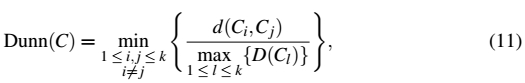

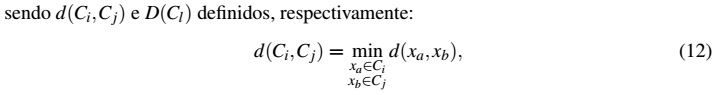

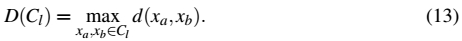

Portanto, valores altos dessa medida indicam soluções que obedecem seu viés. Ademais, ao generalizar os cálculos de d(Ci,Cj) e D(Cl), variantes dessa medida podem ser geradas.

**1.2. Largura de silhueta (LS)**


Assim como o ID, a LS baseia-se nos conceitos de compactação intra-grupo e separação inter-grupos. A silhueta de um objeto individual xi pertencente a um grupo Cl (S(xi)) é
definida por:

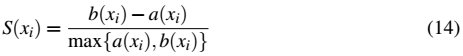

sendo a(xi) e b(xi) calculados como:

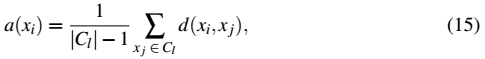

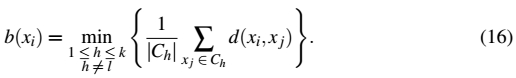

Com isso, a LS é definida como a silhueta média entre todos os objetos do conjunto de
dados. Ou seja:

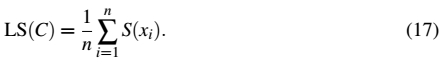

A LS assume valores no intervalo [−1,1]. A melhor partição possível segundo esse critério é aquela que atinge LS(C) = 1.


Um exemplo da LS em Python é apresentado a seguir.

In [ ]:
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
import pandas
# carregando blobs.csv sem a coluna 'label'
dados = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/Examples/blobs.csv', usecols=[0, 1])
dados = dados.values
# Executando o algoritmo k-means.
centroides, rotulos, sse = k_means(dados,
                                   n_clusters=3,
init='random',
n_init=100)
# Calculando a largura de silhueta.
# O primeiro parametro eh o conjunto de dados estudado.
# O segundo engloba os rotulos encontrados por um algoritmo.
# O parametro 'metric' indica a medida de distancia
# utilizada. No caso do algoritmo k-means, sera informado
# 'sqeuclidean' que eh a distancia euclidiana ao
# quadrado.
s = silhouette_score(dados, rotulos, metric='sqeuclidean')

**2. Critérios de validação interna**

Índices de validação interna medem o grau em que uma solução de agrupamento é justificada com base apenas no conjunto de dados original ou em uma matriz de similaridades ou dissimilaridades calculadas a partir do mesmo. Assim, um índice de validação interna pode ser visto como o grau de concordância entre um agrupamento encontrado por um algoritmo de agrupamento e o próprio conjunto de dados.


Muitas vezes, índices de validação interna são utilizados como função objetivo a ser otimizada por algoritmos de agrupamento. Como exemplo, tem-se a relação entre o
SSE (Equação 9) e o k-means.

**Exercício 5.** Em muitas aplicações, o SSE é utilizado como critério de qualidade na seleção de uma dentre várias soluções de agrupamento disponíveis. Desse modo, aquela
com valor mínimo de SSE é normalmente escolhida. Com base nisso, responda:

- O SSE normalmente não é adequado para escolher uma dentre várias soluções com diferentes números de grupos. Por que?

(Dica: aplique o k-means em diversos conjuntos de dados, por exemplo blobs.csv e Iris, considerando vários valores para o números de grupos e observe o comportamento do SSE).

**3. Critérios de validação externa**


Critérios de validação externa avaliam o grau de concordância entre duas soluções de agrupamento de dados. Em várias aplicações práticas, uma das partições comparadas consistirá em uma solução obtida por algum algoritmo, denotada por Cap_04_TX_01.jpg , enquanto que a partição restante representará uma solução de referência para o conjunto de dados estudado, denotada por Cap_04_TX_02.jpg .

Vários dos critérios de similaridade para a comparação de partições baseiam-se
na contagem de pares de objetos. Assim, nesse tipo de abordagem, as seguintes variáveis
são definidas:

• a11: quantidade de pares de objetos em um mesmo grupo em Cob e Cref;

• a10: quantidade de pares de objetos em um mesmo grupo em Cob mas em grupos diferentes em Cre f ;

• a01: quantidade de pares de objetos em grupos diferentes em Cob mas em um mesmo grupo em Cre f ;

• a00: quantidade de pares de objetos pertencentes a grupos diferentes tanto em Cob quanto em Cref.


A seguir, cinco dos índices de validação externa mais conhecidos para avaliação de agrupamentos particionais.

**3.1. Índice Rand (IR)**

 O critério IR calcula a proporção de acordos no agrupamento de pares de objetos entre duas partições (a11 e a00) em relação ao total de pares possíveis de objetos. Ou seja:

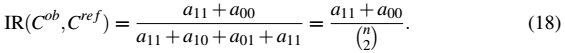

Esta medida retorna valores no intervalo [0,1], com valores mais altos indicando uma maior similaridade entre duas partições.

**3.2. Índice Jaccard (IJ)**

O critério IJ calcula a proporção de pares de objetos agrupados conjuntamente em Cob e Cref em relação à quantidade de pares de objetos em um mesmo grupo em Cob ou em
Cref . Ou seja:

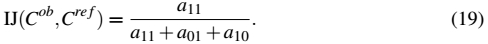

Assim como o IR, o IJ está contido no intervalo [0,1] com valores mais altos apontando uma maior concordância entre Cob e Cre f .

**3.3. Índice Rand Ajustado (IRA)**

Um dos problemas do IR tradicional advém da dificuldade em determinar "quão bom"ou "quão alto"é um valor obtido na comparação de duas partições. Essa dificuldade existe
pois, ao comparar duas partições geradas aleatoriamente, valores inesperadamente altos podem ocorrer. Em tais situações, torna-se necessário ajustar o índice para aleatoriadade.

Desse modo, a versão ajustada do IR obedece a definição a seguir:

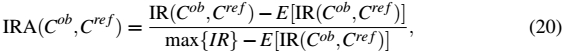

onde  E[IR(Cob, Cref)] indica o valor esperado do IR ao comparar as partições Cob e Cref e max{IR} indica o valor máximo atingido por essa medida (ou seja, max{IR} = 1).

Critérios de validação externa, quando ajustados para aleatoriedade, assumem valores no intervalo (−∞,1]. Assim, valores positivos indicam que a similaridade entre Cob
e Cre f é maior do que o valor esperado ao comparar agrupamentos gerados aleatoriamente. O cálculo do IRA é dado por:

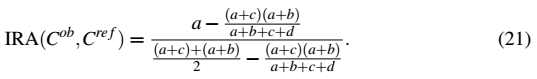

**3.4. Informação Mútua (IM)**

A medida IM mede a informação compartilhada entre Cob e Cref . Em outras palavras, essa medida quantifica a quantidade de informação sobre Cre f obtida através de Cob e
vice-versa. A IM é calculada como:

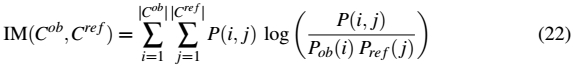

sendo P(i, j), Pob(i) e Pre f ( j) definidos, respectivamente, por:

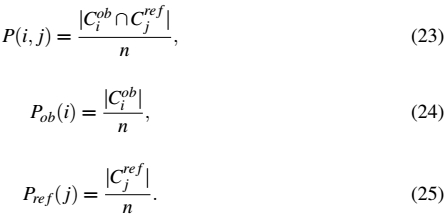

O valor mínimo para a IM é igual a zero, sendo que valores mais altos indicam uma melhor concordância entre as partições comparadas. Uma das principais desvatangens
dessa medida é a ausência de um limitante superior. Para fins comparativos, uma versão
normalizada da mesma para o intervalo [0,1] é mais adequada.

Uma das variações mais conhecidas (IMN) é apresentada na próxima subseção.

**3.5. Informação Mútua Normalizada (IMN)**

Uma das normalizações mais conhecidas da IM pode ser definida como:

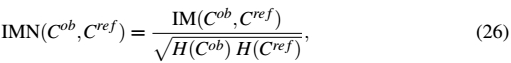

onde H(·) representa a entropia de um agrupamento, calculada por meio da fórmula a seguir:

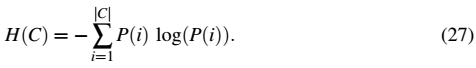

Desse modo, a IMN está contida no intervalo [0,1], com valores mais altos apontando uma maior similaridade entre as partições comparadas.

**3.6. Exemplos**

A seguir é apresentado um exemplo de código em Python para o cálculo do IRA, IM e IMN.

In [ ]:
from sklearn.cluster import k_means
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
import pandas
# carregando blobs.csv sem a coluna 'label'
dados = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/Examples/blobs.csv') # Loads the entire dataframe, including the 'label' column
rotulos_dados = dados['label'].values # Extracts the 'label' column as a numpy array
dados = dados.drop('label', axis=1).values # Removes the 'label' column from the dataframe and converts it to a numpy array

# Executando o algoritmo k-means.
centroides, rotulos_kmeans, sse = k_means(dados,
n_clusters=3,
init='random',
n_init=100)
# Calculando o IRA.
ira = adjusted_rand_score(rotulos_dados, rotulos_kmeans)
# Calculando o IM.
im = mutual_info_score(rotulos_dados, rotulos_kmeans)
# Calculando o IMN.
imn = normalized_mutual_info_score(rotulos_dados,
rotulos_kmeans)

**Exercícios**

1. Uma extensão direta do algoritmo k-means, capaz de gerar, divisivamente, uma hierarquia de grupos, é conhecida por bisecting k-means. Implemente o bisecting k-means, de modo que retorne a hierarquia de grupos produzida, e aplique-o ao
conjunto de dados Iris.

2. Implemente o ID, o IR e o IJ. Aplique o k-means para os conjuntos blobs.csv, moons.csv e Iris. Calcule os valores dos índices para os resultados do k-means.